In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd


## Discriminante Logístico: 
- Termo de regalarização (omissão: Ridge - l2)
- <u>Regularização Lasso (l1):</u> Permite colocar vários valores de pesos a 0, que posteriomente podem excluir dimensões que não são uteis. 
- <u>Regularização Ridge (l2):</u> Acrescentamos à função de custo mais uma função de custo, que penaliza pesos com valores de w altos. 

Parametros em ter em conta: 
- tol - tolerância: Se a diferença entre a iteração anterior e a iteração atual, o algoritmo para automáticamente. 
- max_iter - Número máximo de iterações
- solver - métodos de otimização: Ex: máxima descida de gradiente (omissão: lbgs). Neste caso o sklearn usa adaptações do exemplo acima. Liblinear - APENAS PARA CLASSIFICAÇÃO BINÁRIA 
- Multiclasse
- C - Termo de regularização (quanto maior o C, menor a regularização)
- penalty: l1 - lasso, l2 - ridge ou elastic net (combinação l1 e l2)

## Discriminante Logístico - Classificação Binária

In [2]:
from sklearn.linear_model import LogisticRegression

fN = '/Users/anaso/Documents/AA/AA-22-23/Laboratorios/Lab5/binClassData.p'

D = pickle.load(open(fN, 'rb'))

X1 = D['Xtrain']
y1 = D['trueClassTrain']
X2 = D['Xtest']
y2 = D['trueClassTest']

In [3]:
X2.shape

(2, 50)

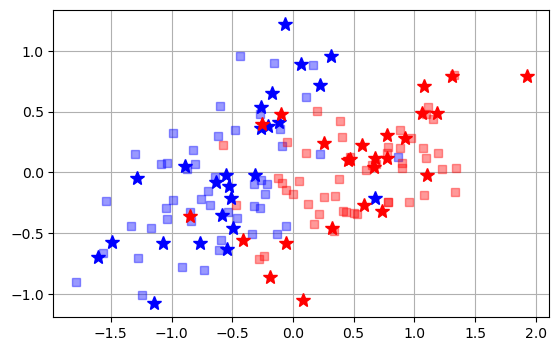

In [5]:
plt.plot(X1[0, y1==0], X1[1, y1==0], 'sb', X1[0, y1==1], X1[1, y1==1], 'sr', alpha=0.4)
plt.plot(X2[0, y2==0], X2[1, y2==0], '*b', X2[0, y2==1], X2[1, y2==1], '*r', ms=10)
plt.axis('scaled')
plt.grid(True)

- Regularização Lasso
    - C = 0.1

In [22]:
dl = LogisticRegression(penalty='l2', C=0.1, random_state=42, solver='saga').fit(X1.T, y1)
print('Train Score: ', dl.score(X1.T, y1))
print('Test Score: ', dl.score(X2.T, y2))

Train Score:  0.87
Test Score:  0.82


In [23]:
w = dl.coef_
w = w.squeeze()
w0 = dl.intercept_
print('w0', w0)
print('w', w)

w0 [0.0583961]
w [ 1.28535287 -0.03823838]


x1: [-2  2]
x2: [-65.70125064  68.75556908]


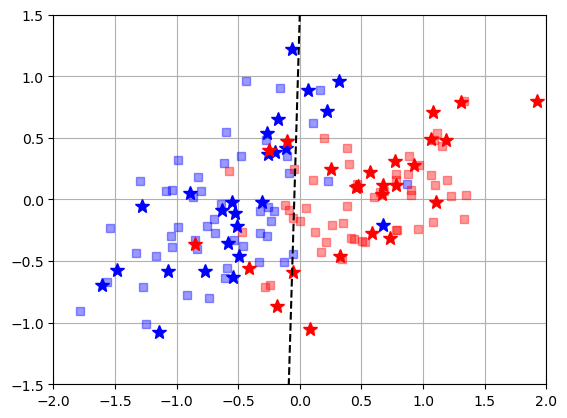

In [24]:
x1 = np.array([-2, 2])
x2 = -1/w[1]*(w0+w[0]*x1)
print('x1:', x1)
print('x2:', x2)

plt.plot(X1[0, y1==0], X1[1, y1==0], 'sb', X1[0, y1==1], X1[1, y1==1], 'sr', alpha=0.4)
plt.plot(X2[0, y2==0], X2[1, y2==0], '*b', X2[0, y2==1], X2[1, y2==1], '*r', ms=10)
plt.plot(x1, x2, '--k')
plt.axis('scaled')
plt.axis([-2, 2, -1.5, 1.5])
plt.grid(True)


- Regularização Lasso
    - C = 1

In [37]:
dl = LogisticRegression(penalty='l2', C=1, random_state=42, solver='saga').fit(X1.T, y1)
print('Train Score: ', dl.score(X1.T, y1))
print('Test Score: ', dl.score(X2.T, y2))

Train Score:  0.88
Test Score:  0.86


In [38]:
w = dl.coef_
w = w.squeeze()
w0 = dl.intercept_
print('w0', w0)
print('w', w)

w0 [0.1275197]
w [ 3.08495978 -0.73529014]


x1: [-2  2]
x2: [-8.21770829  8.56456376]


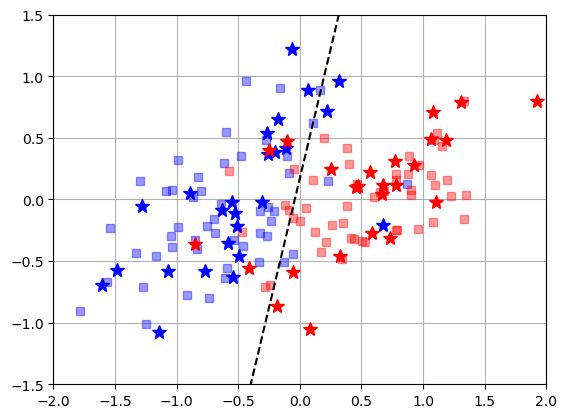

In [39]:
x1 = np.array([-2, 2])
x2 = -1/w[1]*(w0+w[0]*x1)
print('x1:', x1)
print('x2:', x2)

plt.plot(X1[0, y1==0], X1[1, y1==0], 'sb', X1[0, y1==1], X1[1, y1==1], 'sr', alpha=0.4)
plt.plot(X2[0, y2==0], X2[1, y2==0], '*b', X2[0, y2==1], X2[1, y2==1], '*r', ms=10)
plt.plot(x1, x2, '--k')
plt.axis('scaled')
plt.axis([-2, 2, -1.5, 1.5])
plt.grid(True)


- Regularização Lasso
    - C = 100

In [34]:
dl = LogisticRegression(penalty='l2', C=100, random_state=42, solver='saga').fit(X1.T, y1)
print('Train Score: ', dl.score(X1.T, y1))
print('Test Score: ', dl.score(X2.T, y2))

Train Score:  0.91
Test Score:  0.9


In [35]:
w = dl.coef_
w = w.squeeze()
w0 = dl.intercept_
print('w0', w0)
print('w', w)

w0 [0.21044312]
w [ 5.06437973 -1.90374407]


x1: [-2  2]
x2: [-5.20990006  5.43098347]


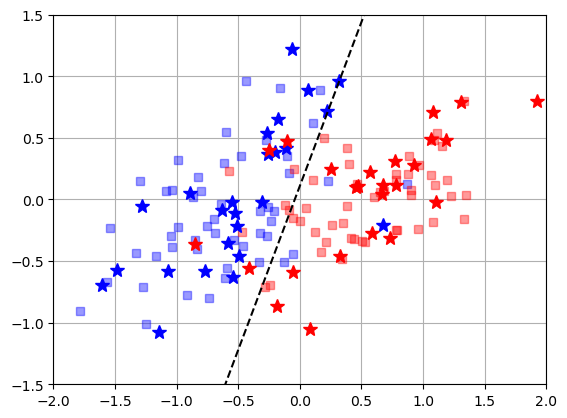

In [36]:
x1 = np.array([-2, 2])
x2 = -1/w[1]*(w0+w[0]*x1)
print('x1:', x1)
print('x2:', x2)

plt.plot(X1[0, y1==0], X1[1, y1==0], 'sb', X1[0, y1==1], X1[1, y1==1], 'sr', alpha=0.4)
plt.plot(X2[0, y2==0], X2[1, y2==0], '*b', X2[0, y2==1], X2[1, y2==1], '*r', ms=10)
plt.plot(x1, x2, '--k')
plt.axis('scaled')
plt.axis([-2, 2, -1.5, 1.5])
plt.grid(True)


- Regularização Ridge
    - C = 0.1

In [25]:
dl = LogisticRegression(penalty='l1', C=0.1, random_state=42, solver='saga').fit(X1.T, y1)
print('Train Score: ', dl.score(X1.T, y1))
print('Test Score: ', dl.score(X2.T, y2))

Train Score:  0.89
Test Score:  0.8


In [26]:
w = dl.coef_
w = w.squeeze()
w0 = dl.intercept_
print('w0', w0)
print('w', w)

w0 [0.0766121]
w [1.60442774 0.        ]


x1: [-2  2]
x2: [ inf -inf]


C:\Users\anaso\AppData\Local\Temp\ipykernel_18144\800415492.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  x2 = -1/w[1]*(w0+w[0]*x1)


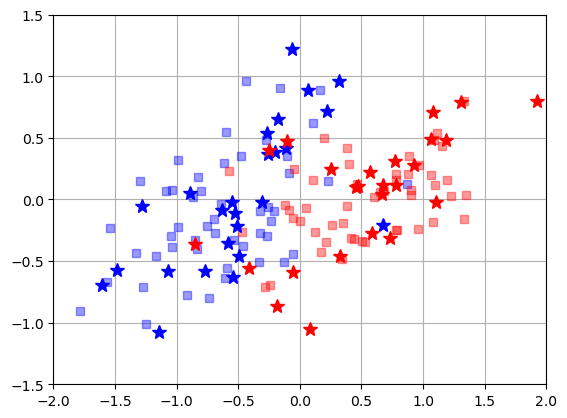

In [27]:
x1 = np.array([-2, 2])
x2 = -1/w[1]*(w0+w[0]*x1)
print('x1:', x1)
print('x2:', x2)

plt.plot(X1[0, y1==0], X1[1, y1==0], 'sb', X1[0, y1==1], X1[1, y1==1], 'sr', alpha=0.4)
plt.plot(X2[0, y2==0], X2[1, y2==0], '*b', X2[0, y2==1], X2[1, y2==1], '*r', ms=10)
plt.plot(x1, x2, '--k')
plt.axis('scaled')
plt.axis([-2, 2, -1.5, 1.5])
plt.grid(True)

## NOTA: Não é possível desenhar a reta porque existe pelo menos um w =0


- Regularização Ridege
    - C = 1

In [40]:
dl = LogisticRegression(penalty='l2', C=1, random_state=42, solver='saga').fit(X1.T, y1)
print('Train Score: ', dl.score(X1.T, y1))
print('Test Score: ', dl.score(X2.T, y2))

Train Score:  0.88
Test Score:  0.86


In [41]:
w = dl.coef_
w = w.squeeze()
w0 = dl.intercept_
print('w0', w0)
print('w', w)

w0 [0.1275197]
w [ 3.08495978 -0.73529014]


x1: [-2  2]
x2: [-8.21770829  8.56456376]


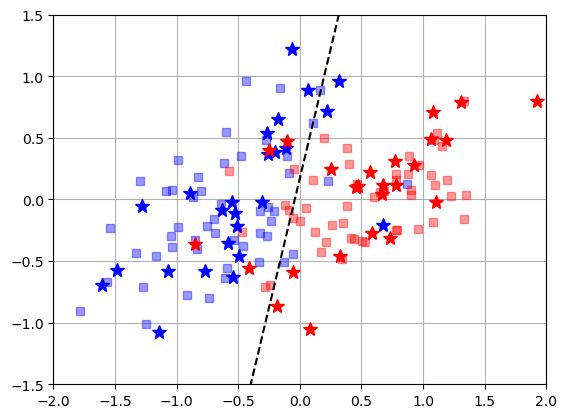

In [42]:
x1 = np.array([-2, 2])
x2 = -1/w[1]*(w0+w[0]*x1)
print('x1:', x1)
print('x2:', x2)

plt.plot(X1[0, y1==0], X1[1, y1==0], 'sb', X1[0, y1==1], X1[1, y1==1], 'sr', alpha=0.4)
plt.plot(X2[0, y2==0], X2[1, y2==0], '*b', X2[0, y2==1], X2[1, y2==1], '*r', ms=10)
plt.plot(x1, x2, '--k')
plt.axis('scaled')
plt.axis([-2, 2, -1.5, 1.5])
plt.grid(True)


- Regularização Ridge
    - C = 100

In [28]:
dl = LogisticRegression(penalty='l1', C=100, random_state=42, solver='saga').fit(X1.T, y1)
print('Train Score: ', dl.score(X1.T, y1))
print('Test Score: ', dl.score(X2.T, y2))

Train Score:  0.91
Test Score:  0.9


In [29]:
w = dl.coef_
w = w.squeeze()
w0 = dl.intercept_
print('w0', w0)
print('w', w)

w0 [0.21308362]
w [ 5.11435535 -1.92939493]


x1: [-2  2]
x2: [-5.19107151  5.4119528 ]


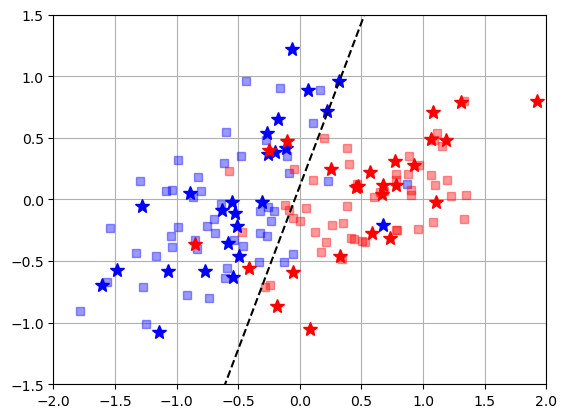

In [30]:
x1 = np.array([-2, 2])
x2 = -1/w[1]*(w0+w[0]*x1)
print('x1:', x1)
print('x2:', x2)

plt.plot(X1[0, y1==0], X1[1, y1==0], 'sb', X1[0, y1==1], X1[1, y1==1], 'sr', alpha=0.4)
plt.plot(X2[0, y2==0], X2[1, y2==0], '*b', X2[0, y2==1], X2[1, y2==1], '*r', ms=10)
plt.plot(x1, x2, '--k')
plt.axis('scaled')
plt.axis([-2, 2, -1.5, 1.5])
plt.grid(True)


- Sem regularização

In [43]:
dl = LogisticRegression(penalty='none', C=100, random_state=42, solver='saga').fit(X1.T, y1)
print('Train Score: ', dl.score(X1.T, y1))
print('Test Score: ', dl.score(X2.T, y2))

Train Score:  0.91
Test Score:  0.9


c:\Users\anaso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [44]:
w = dl.coef_
w = w.squeeze()
w0 = dl.intercept_
print('w0', w0)
print('w', w)

w0 [0.21347628]
w [ 5.130268   -1.94293389]


x1: [-2  2]
x2: [-5.17107648  5.3908228 ]


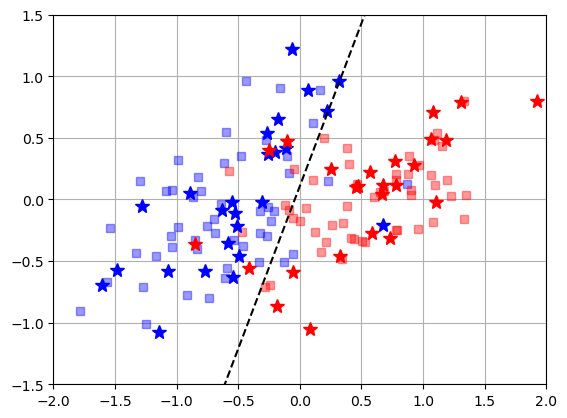

In [45]:
x1 = np.array([-2, 2])
x2 = -1/w[1]*(w0+w[0]*x1)
print('x1:', x1)
print('x2:', x2)

plt.plot(X1[0, y1==0], X1[1, y1==0], 'sb', X1[0, y1==1], X1[1, y1==1], 'sr', alpha=0.4)
plt.plot(X2[0, y2==0], X2[1, y2==0], '*b', X2[0, y2==1], X2[1, y2==1], '*r', ms=10)
plt.plot(x1, x2, '--k')
plt.axis('scaled')
plt.axis([-2, 2, -1.5, 1.5])
plt.grid(True)


In [59]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

BC = load_breast_cancer()
X = BC.data
y = BC.target

features_names = BC.feature_names

X1, X2, y1, y2 = train_test_split(X, y, test_size=1/3)

In [60]:
Dlog = LogisticRegression(penalty='l2', C=1, random_state=42, solver='saga', max_iter=5000).fit(X1, y1)
print("Train Score: ", Dlog.score(X1, y1))
print("Test Score: ", Dlog.score(X2, y2))
# print(Dlog.coef_)

Train Score:  0.9155672823218998
Test Score:  0.9368421052631579


In [61]:
w = Dlog.coef_
w = w.squeeze()
print(w)

[ 1.26833917e-02  8.24179462e-03  6.72884973e-02  1.36826686e-02
  7.80111366e-05 -2.23407122e-04 -4.49951682e-04 -2.05636999e-04
  1.80289064e-04  8.47502225e-05  3.34443187e-05  7.02222618e-04
 -1.08148070e-03 -2.64365472e-02  3.75598788e-06 -4.19456892e-05
 -5.30391983e-05 -1.75119978e-05  1.28112262e-05 -1.43409179e-06
  1.32904361e-02  8.61782016e-03  6.53183624e-02 -2.64366059e-02
  6.93679939e-05 -7.62700996e-04 -1.07380100e-03 -3.28991440e-04
  1.57766387e-04  3.02283600e-05]


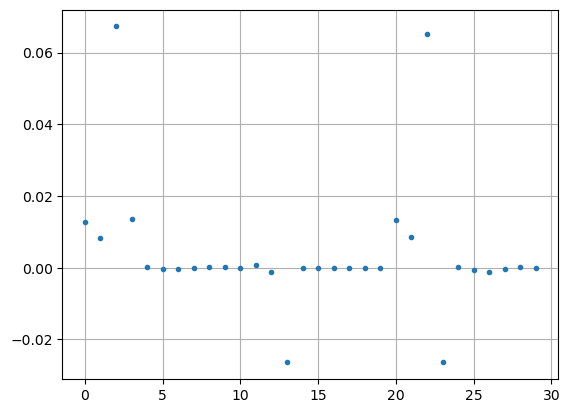

In [62]:
plt.plot(w, '.')
plt.grid(True)

In [63]:
Dlog = LogisticRegression(penalty='l1', C=1, random_state=42, solver='saga', max_iter=5000).fit(X1, y1)
print("Train Score: ", Dlog.score(X1, y1))
print("Test Score: ", Dlog.score(X2, y2))
# print(Dlog.coef_)

Train Score:  0.9155672823218998
Test Score:  0.9368421052631579


In [64]:
w = Dlog.coef_
w = w.squeeze()
print(w)

[ 1.24886929e-02  8.08868105e-03  6.72514593e-02  1.36460076e-02
  0.00000000e+00 -2.64613031e-05 -2.23508619e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  4.80514688e-04
 -9.68088649e-04 -2.62773273e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.30948451e-02  8.48783207e-03  6.52738333e-02 -2.63879286e-02
  0.00000000e+00 -5.51279323e-04 -8.47634207e-04 -1.03222084e-04
  0.00000000e+00  0.00000000e+00]


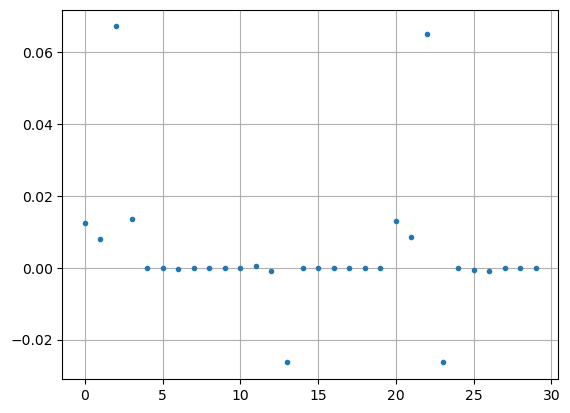

In [65]:
plt.plot(w, '.')
plt.grid(True)

In [66]:
np.sum(w==0) # Quantos coeficientes são iguais a zero?

14

In [69]:
print(features_names[w!=0]) # Quais as features cujos coeficientes não são zero? 

print(np.argwhere(w!=0)) # Quais os indices dos ws diferentes de zero?

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean compactness' 'mean concavity' 'texture error' 'perimeter error'
 'area error' 'worst radius' 'worst texture' 'worst perimeter'
 'worst area' 'worst compactness' 'worst concavity' 'worst concave points']
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 5]
 [ 6]
 [11]
 [12]
 [13]
 [20]
 [21]
 [22]
 [23]
 [25]
 [26]
 [27]]


- Diminuindo o termo de regularização para maior, ou seja, C menor (C=0.1)

In [70]:
Dlog = LogisticRegression(penalty='l1', C=0.1, random_state=42, solver='saga', max_iter=5000).fit(X1, y1)
print("Train Score: ", Dlog.score(X1, y1))
print("Test Score: ", Dlog.score(X2, y2))
# print(Dlog.coef_)

Train Score:  0.9155672823218998
Test Score:  0.9368421052631579


In [71]:
w = Dlog.coef_
w = w.squeeze()
print(w)

[ 0.01071092  0.0067355   0.06680718  0.01331688  0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.02480428  0.          0.          0.          0.
  0.          0.          0.01130796  0.00736182  0.06478335 -0.0259299
  0.          0.          0.          0.          0.          0.        ]


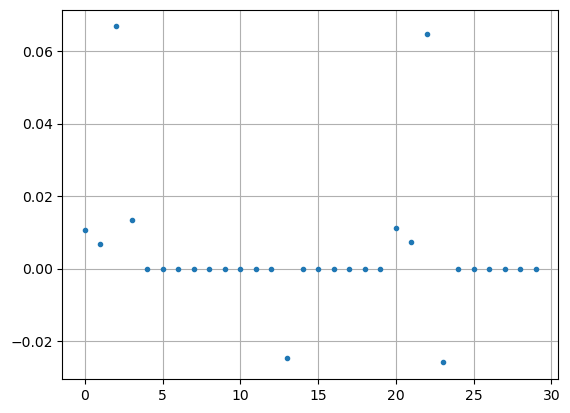

In [72]:
plt.plot(w, '.')
plt.grid(True)

In [73]:
np.sum(w==0) # Quantos coeficientes são iguais a zero?

21

In [74]:
print(features_names[w!=0]) # Quais as features cujos coeficientes não são zero? 

print(np.argwhere(w!=0).squeeze()) # Quais os indices dos ws diferentes de zero?

['mean radius' 'mean texture' 'mean perimeter' 'mean area' 'area error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area']
[ 0  1  2  3 13 20 21 22 23]


## Discriminante Logístico - Classificação Multiclasse

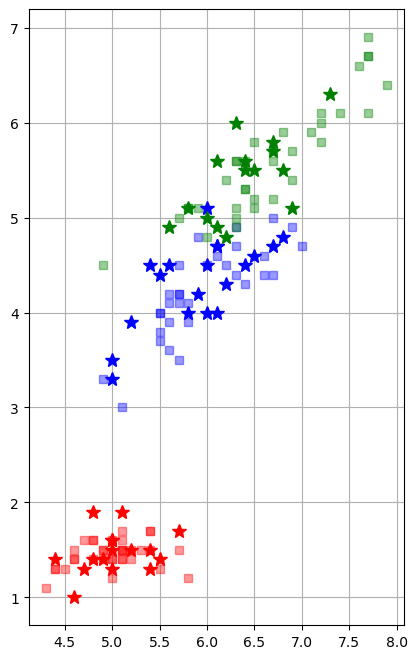

In [78]:
from sklearn.datasets import load_iris

D = load_iris()

X = D.data
y = D.target

X1, X2, y1, y2 = train_test_split(X, y, test_size=1/3, shuffle=True, random_state=0)

plt.figure(figsize=(5,8))
plt.plot(X1[y1==0, 0], X1[y1==0, 2], 'sr', X1[y1==1, 0], X1[y1==1, 2], 'sb', X1[y1==2, 0], X1[y1==2, 2], 'sg', alpha=0.4)
plt.plot(X2[y2==0, 0], X2[y2==0, 2], '*r', X2[y2==1, 0], X2[y2==1, 2], '*b', X2[y2==2, 0], X2[y2==2, 2], '*g', ms=10)
plt.axis('scaled')
plt.grid(True)

In [79]:
dl = LogisticRegression(solver='liblinear', C=0.1, penalty='l1').fit(X1, y1)
y2e = dl.predict(X2)
print("Número de erros (teste):", np.sum(y2 != y2e))
print('--------------------')
print(dl.coef_)

Número de erros (teste): 19
--------------------
[[ 0.00000000e+00  8.78254198e-01 -1.09197173e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.52413788e-01  1.02411696e-03  0.00000000e+00]
 [-7.29625630e-01  0.00000000e+00  9.64454780e-01  0.00000000e+00]]


In [81]:
# Mudo a penalização para L2 e deixam de haver coeficientes a zero
dl = LogisticRegression(solver='liblinear', C=0.1, penalty='l2').fit(X1, y1)
y2e = dl.predict(X2)
print("Número de erros (teste):", np.sum(y2 != y2e))
print('--------------------')
print(dl.coef_)

Número de erros (teste): 17
--------------------
[[ 0.19273333  0.65520298 -1.08482865 -0.49532598]
 [-0.01688408 -0.49238353  0.23244076 -0.1376741 ]
 [-0.52775573 -0.47775972  0.83166947  0.61984488]]


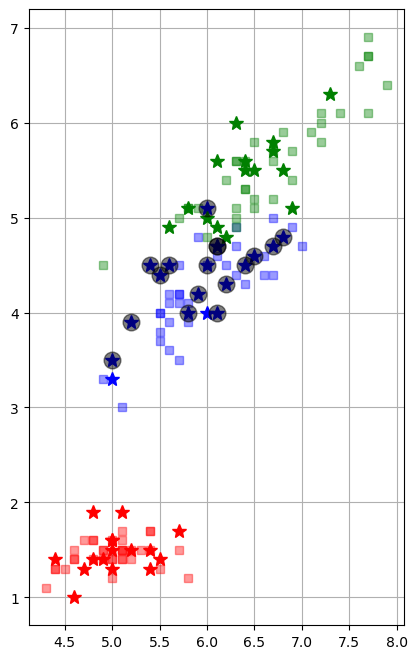

In [82]:
# Visualizar os erros
plt.figure(figsize=(5,8))
plt.plot(X1[y1==0, 0], X1[y1==0, 2], 'sr', X1[y1==1, 0], X1[y1==1, 2], 'sb', X1[y1==2, 0], X1[y1==2, 2], 'sg', alpha=0.4)
plt.plot(X2[y2==0, 0], X2[y2==0, 2], '*r', X2[y2==1, 0], X2[y2==1, 2], '*b', X2[y2==2, 0], X2[y2==2, 2], '*g', ms=10)
plt.plot(X2[y2 != y2e, 0], X2[y2!=y2e, 2], 'ok', alpha=0.5, ms=12)
plt.axis('scaled')
plt.grid(True)

In [87]:
# Multinomial (multiclasse) com l1
dl = LogisticRegression(solver='saga', C=0.1, penalty='l1', multi_class='multinomial', max_iter=1000).fit(X1, y1)
y2e = dl.predict(X2)
print("Número de erros (teste):", np.sum(y2 != y2e))
print('--------------------')
print(dl.coef_)

Número de erros (teste): 2
--------------------
[[ 0.          0.         -1.3979234   0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          1.15871726  0.        ]]


## Máquinas de Suporte Vetorial

- Para além do que o discriminante linear faz, as máquinas de suporte vetorial maximizam a distância interclasse, ou seja, a marguem entre as duas classes deve ser a maior possível. 
- Os vetores que ficam mais próximos da margem são os chamados os vetores de suporte. São estes os pontos que servem de base à máquina de suporte vetorial para calcular a melhor fronteira de decisão (maximizando a distância entre eles). 
- É necessário definir uma função de kernel para estes modelos. 

Parameros a considerar: 
- hinge loss: caso os vetores não sejam separaveis, é tido em conta um erro. Este parametro permite que existam este tipo de erros. 
- C: termo de regularização. Quando maior menor a regularização.  

SVC (com parametro linear) Vs Linear SVC: 
- Linear SVC está mais otimizado. Lida melhor com a alta dimensionalidade dos dados. 

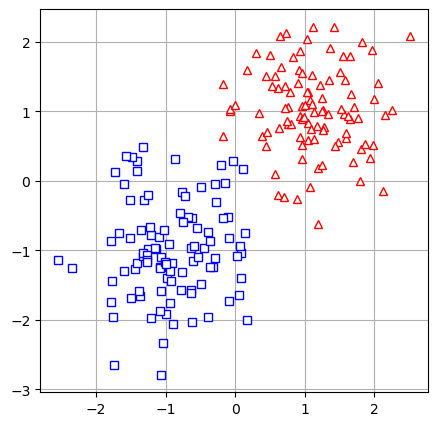

In [15]:
# Dados gausianos
Nc = 100
x1 = rd.randn(2, Nc)*.6-1
x2 = rd.randn(2, Nc)*.6+1

y = np.hstack((np.zeros(Nc), np.ones(Nc)))
X = np.hstack((x1, x2))
plt.figure(figsize=(5, 7))
plt.plot(x1[0, :], x1[1, :], 'sb', mfc='w')
plt.plot(x2[0, :], x2[1, :], '^r', mfc='w')
plt.axis('scaled')
plt.grid(True)


Número de erros:  1 2
[-0.32956127] [1.6877406  1.14429407] [-0.25211211] [1.95366725 1.35265672]


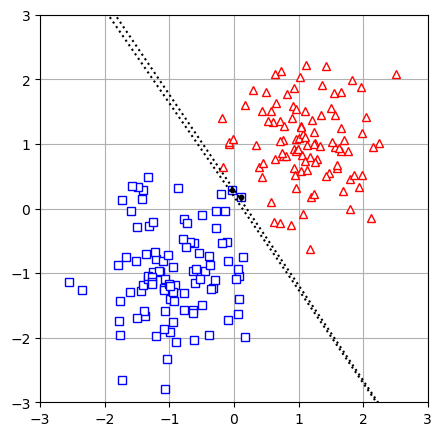

In [17]:
from sklearn.svm import LinearSVC, SVC
svm1 = LinearSVC(dual=False, C=1).fit(X.T, y)
svm2 = SVC(kernel='linear', C=1).fit(X.T, y)

y1 = svm1.predict(X.T)
y2 = svm2.predict(X.T)

print("Número de erros: ", np.sum(y != y1), np.sum(y != y2))

w1 = svm1.coef_.squeeze()
w2 = svm2.coef_.squeeze()
w0a = svm1.intercept_
w0b = svm2.intercept_

gx = np.array([-3, 3])
gy1 = -1/w1[1]*(w1[0]*gx+w0a)
gy2 = -1/w2[1]*(w2[0]*gx+w0b)


plt.figure(figsize=(5, 7))
plt.plot(x1[0, :], x1[1, :], 'sb', mfc='w')
plt.plot(x2[0, :], x2[1, :], '^r', mfc='w')
plt.plot(X[0, y!= y1], X[1, y != y1], 'ok', ms=3)
plt.plot(X[0, y!= y2], X[1, y != y2], 'ok', ms=3)
plt.plot(gx, gy1, ':k')
plt.plot(gx, gy2, ':k')
plt.axis('scaled')
plt.axis([-3, 3, -3, 3])
plt.grid(True)


print(w0a, w1, w0b, w2)

Número de erros:  2


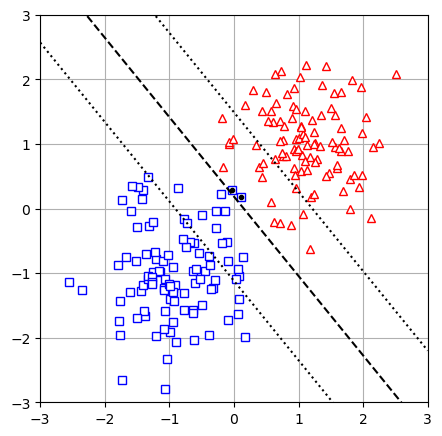

In [23]:
svm = LinearSVC(dual=False, C=0.1).fit(X.T, y)
ye = svm.predict(X.T)
print("Número de erros: ", np.sum(y != ye))

w = svm.coef_.squeeze()
w0 = svm.intercept_

gx = np.array([-3, 3])
gy = -1/w[1]*(w[0]*gx+w0)

# Margem de decisão
mg = 1/np.sqrt(np.sum(w**2))
gy1 = -1/w[1]*(w[0]*gx+w0-mg)
gy2 = -1/w[1]*(w[0]*gx+w0+mg)

plt.figure(figsize=(5, 7))
plt.plot(x1[0, :], x1[1, :], 'sb', mfc='w')
plt.plot(x2[0, :], x2[1, :], '^r', mfc='w')
plt.plot(X[0, y!= ye], X[1, y != ye], 'ok', ms=3)
plt.plot(gx, gy, '--k')
plt.plot(gx, gy1, ':k')
plt.plot(gx, gy2, ':k')
plt.axis('scaled')
plt.axis([-3, 3, -3, 3])
plt.grid(True)


Número de erros:  1


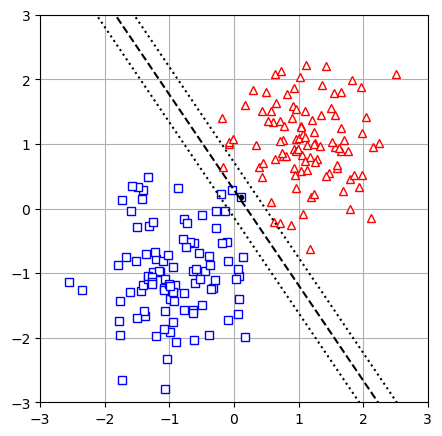

In [25]:
svm = LinearSVC(dual=False, C=1).fit(X.T, y)
ye = svm.predict(X.T)
print("Número de erros: ", np.sum(y != ye))

w = svm.coef_.squeeze()
w0 = svm.intercept_

gx = np.array([-3, 3])
gy = -1/w[1]*(w[0]*gx+w0)

# Margem de decisão
mg = 1/np.sqrt(np.sum(w**2))
gy1 = -1/w[1]*(w[0]*gx+w0-mg)
gy2 = -1/w[1]*(w[0]*gx+w0+mg)

plt.figure(figsize=(5, 7))
plt.plot(x1[0, :], x1[1, :], 'sb', mfc='w')
plt.plot(x2[0, :], x2[1, :], '^r', mfc='w')
plt.plot(X[0, y!= ye], X[1, y != ye], 'ok', ms=3)
plt.plot(gx, gy, '--k')
plt.plot(gx, gy1, ':k')
plt.plot(gx, gy2, ':k')
plt.axis('scaled')
plt.axis([-3, 3, -3, 3])
plt.grid(True)


Número de erros:  0


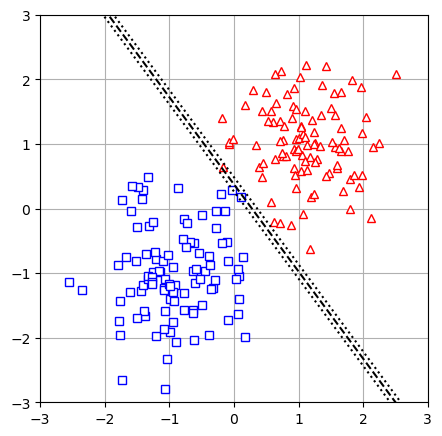

In [24]:
svm = LinearSVC(dual=False, C=10).fit(X.T, y)
ye = svm.predict(X.T)
print("Número de erros: ", np.sum(y != ye))

w = svm.coef_.squeeze()
w0 = svm.intercept_

gx = np.array([-3, 3])
gy = -1/w[1]*(w[0]*gx+w0)

# Margem de decisão
mg = 1/np.sqrt(np.sum(w**2))
gy1 = -1/w[1]*(w[0]*gx+w0-mg)
gy2 = -1/w[1]*(w[0]*gx+w0+mg)

plt.figure(figsize=(5, 7))
plt.plot(x1[0, :], x1[1, :], 'sb', mfc='w')
plt.plot(x2[0, :], x2[1, :], '^r', mfc='w')
plt.plot(X[0, y!= ye], X[1, y != ye], 'ok', ms=3)
plt.plot(gx, gy, '--k')
plt.plot(gx, gy1, ':k')
plt.plot(gx, gy2, ':k')
plt.axis('scaled')
plt.axis([-3, 3, -3, 3])
plt.grid(True)


Número de erros:  2


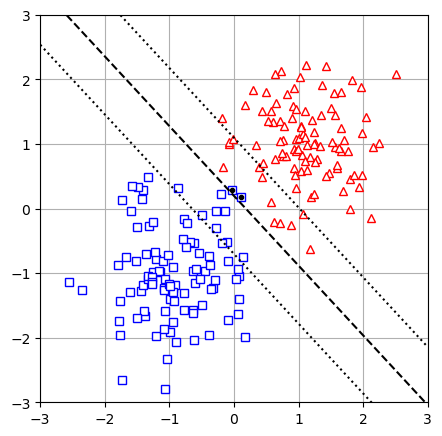

In [26]:
svm = SVC(kernel='linear', C=0.1).fit(X.T, y)
ye = svm.predict(X.T)
print("Número de erros: ", np.sum(y != ye))

w = svm.coef_.squeeze()
w0 = svm.intercept_

gx = np.array([-3, 3])
gy = -1/w[1]*(w[0]*gx+w0)

# Margem de decisão
mg = 1/np.sqrt(np.sum(w**2))
gy1 = -1/w[1]*(w[0]*gx+w0-mg)
gy2 = -1/w[1]*(w[0]*gx+w0+mg)

plt.figure(figsize=(5, 7))
plt.plot(x1[0, :], x1[1, :], 'sb', mfc='w')
plt.plot(x2[0, :], x2[1, :], '^r', mfc='w')
plt.plot(X[0, y!= ye], X[1, y != ye], 'ok', ms=3)
plt.plot(gx, gy, '--k')
plt.plot(gx, gy1, ':k')
plt.plot(gx, gy2, ':k')
plt.axis('scaled')
plt.axis([-3, 3, -3, 3])
plt.grid(True)


Número de erros:  2


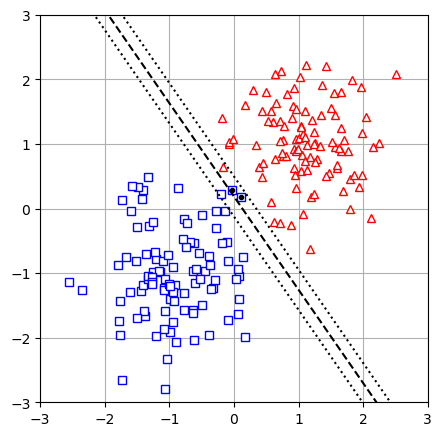

In [27]:
svm = SVC(kernel='linear', C=1).fit(X.T, y)
ye = svm.predict(X.T)
print("Número de erros: ", np.sum(y != ye))

w = svm.coef_.squeeze()
w0 = svm.intercept_

gx = np.array([-3, 3])
gy = -1/w[1]*(w[0]*gx+w0)

# Margem de decisão
mg = 1/np.sqrt(np.sum(w**2))
gy1 = -1/w[1]*(w[0]*gx+w0-mg)
gy2 = -1/w[1]*(w[0]*gx+w0+mg)

plt.figure(figsize=(5, 7))
plt.plot(x1[0, :], x1[1, :], 'sb', mfc='w')
plt.plot(x2[0, :], x2[1, :], '^r', mfc='w')
plt.plot(X[0, y!= ye], X[1, y != ye], 'ok', ms=3)
plt.plot(gx, gy, '--k')
plt.plot(gx, gy1, ':k')
plt.plot(gx, gy2, ':k')
plt.axis('scaled')
plt.axis([-3, 3, -3, 3])
plt.grid(True)

Número de erros:  2


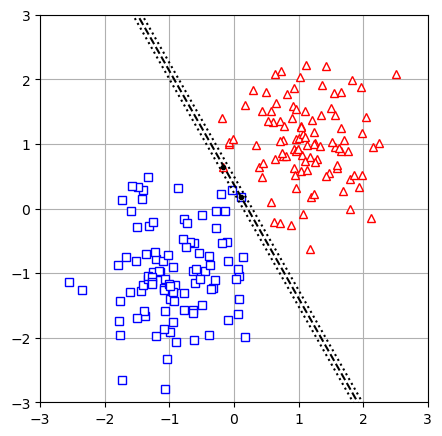

In [28]:
svm = SVC(kernel='linear', C=10).fit(X.T, y)
ye = svm.predict(X.T)
print("Número de erros: ", np.sum(y != ye))

w = svm.coef_.squeeze()
w0 = svm.intercept_

gx = np.array([-3, 3])
gy = -1/w[1]*(w[0]*gx+w0)

# Margem de decisão
mg = 1/np.sqrt(np.sum(w**2))
gy1 = -1/w[1]*(w[0]*gx+w0-mg)
gy2 = -1/w[1]*(w[0]*gx+w0+mg)

plt.figure(figsize=(5, 7))
plt.plot(x1[0, :], x1[1, :], 'sb', mfc='w')
plt.plot(x2[0, :], x2[1, :], '^r', mfc='w')
plt.plot(X[0, y!= ye], X[1, y != ye], 'ok', ms=3)
plt.plot(gx, gy, '--k')
plt.plot(gx, gy1, ':k')
plt.plot(gx, gy2, ':k')
plt.axis('scaled')
plt.axis([-3, 3, -3, 3])
plt.grid(True)

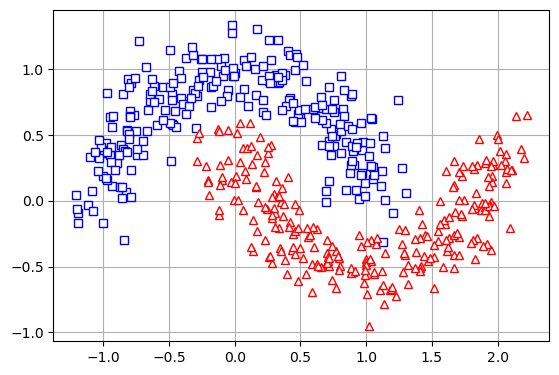

In [37]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.15, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'sb', mfc='w')
plt.plot(X[y==1, 0], X[y==1, 1], '^r', mfc='w')
plt.axis('scaled')
plt.grid(True)

Número de erros:  44


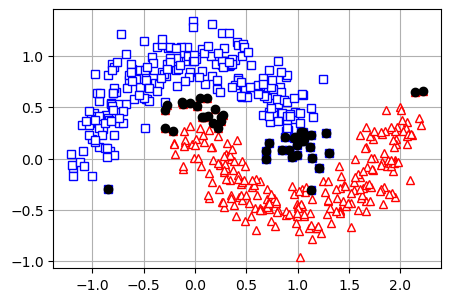

In [39]:
svm = SVC(kernel='poly', degree=3, C=1, coef0=0, gamma='auto').fit(X, y)
ye = svm.predict(X)
plt.figure(figsize=(5,7))
plt.plot(X[y==0, 0], X[y==0, 1], 'sb', mfc='w')
plt.plot(X[y==1, 0], X[y==1, 1], '^r', mfc='w')
plt.plot(X[y!=ye, 0], X[y!=ye, 1], 'ok')
plt.axis('scaled')
plt.grid(True)

print("Número de erros: ", np.sum(y != ye))

Número de erros:  14


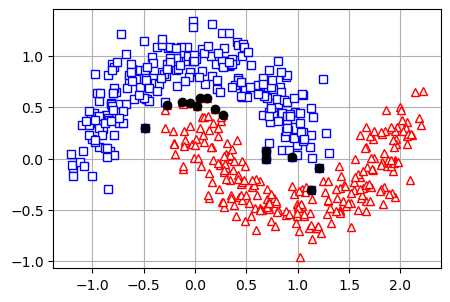

In [41]:
svm = SVC(kernel='poly', degree=3, C=1, coef0=1, gamma='auto').fit(X, y)
ye = svm.predict(X)
plt.figure(figsize=(5,7))
plt.plot(X[y==0, 0], X[y==0, 1], 'sb', mfc='w')
plt.plot(X[y==1, 0], X[y==1, 1], '^r', mfc='w')
plt.plot(X[y!=ye, 0], X[y!=ye, 1], 'ok')
plt.axis('scaled')
plt.grid(True)

print("Número de erros: ", np.sum(y != ye))

In [42]:
# Vetores de suporte
vs = svm.support_vectors_

print(vs.shape)

(91, 2)


Número de erros:  5


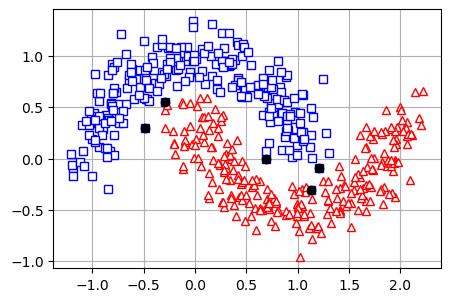

In [43]:
svm = SVC(kernel='poly', degree=3, C=10, coef0=1, gamma='auto').fit(X, y)
ye = svm.predict(X)
plt.figure(figsize=(5,7))
plt.plot(X[y==0, 0], X[y==0, 1], 'sb', mfc='w')
plt.plot(X[y==1, 0], X[y==1, 1], '^r', mfc='w')
plt.plot(X[y!=ye, 0], X[y!=ye, 1], 'ok')
plt.axis('scaled')
plt.grid(True)

print("Número de erros: ", np.sum(y != ye))

In [44]:
# Vetores de suporte
vs = svm.support_vectors_
idx = svm.support_ # Indices dos pontos que correspondem aos vetores de suporte

print(vs.shape, idx.shape)

(46, 2)


In [ ]:
# Quanto maior o lambda maior a regularização, ou seja, pesos mais pequenos

# SVM - Quanto menor o C maior o termo de regularização

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dt
D = dt.load_breast_cancer()

X = D.data
y = D.target

In [6]:
from sklearn.model_selection import train_test_split

X1, X2, y1, y2 = train_test_split(X, y, test_size=1/3, stratify=y, random_state=42)

from sklearn.linear_model import LogisticRegression

# l1 = Regularização Lasso
lr = LogisticRegression(penalty='l1', solver='saga', max_iter=10000).fit(X1, y1)
X1.shape # Dados a 30 dimensões

w = lr.coef_ # pesos
# print(w)

print(np.sum(w==0))




14


In [8]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', gamma='auto').fit(X1, y1)
y2e = svm.predict(X2)

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y2, y2e))

[[  0  71]
 [  0 119]]


In [11]:
svm = SVC(kernel='rbf', gamma=.1).fit(X1, y1)
y2e = svm.predict(X2)
print(confusion_matrix(y2, y2e))


svm = SVC(kernel='rbf', gamma=10).fit(X1, y1)
y2e = svm.predict(X2)
print(confusion_matrix(y2, y2e))

[[  0  71]
 [  0 119]]
[[  0  71]
 [  0 119]]


In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X1)
X1n = sc.transform(X1)
X2n = sc.transform(X2)

svm = SVC(kernel='rbf', gamma=10).fit(X1n, y1)
y2e = svm.predict(X2n)
print(confusion_matrix(y2, y2e))

svm = SVC(kernel='rbf', gamma='auto').fit(X1n, y1)
y2e = svm.predict(X2n)
print(confusion_matrix(y2, y2e))


[[  0  71]
 [  0 119]]
[[ 69   2]
 [  2 117]]


In [ ]:
# Trabalho Prático: 

# Começar com dicionário grande --> Treinar Discriminante Logístico --> 
# Ver valores dos w --> Eliminar entradas do dicionário cujos w=0
# 
# Comparar esses resultados com resultados de um dicionário com aproximadamente as mesmas dimensões
# Comparar resultados com resultados com max_features no TFIDF (aqui é o TFIDF que vai selecionar as features)